In [1]:
import pandas as pd

## First look on data

In [2]:
df = pd.read_csv("./data/jj.csv")

In [3]:
df.head()

,date,data
0,1960-01-01,0.71
1,1960-04-01,0.63
2,1960-07-02,0.85
3,1960-10-01,0.44
4,1961-01-01,0.61


In [4]:
df.tail()

,date,data
79,1979-10-01,9.99
80,1980-01-01,16.20
81,1980-04-01,14.67
82,1980-07-02,16.02
83,1980-10-01,11.61


In [5]:
test_data = df[-4:]
train_data = df[:-4]

In [6]:
test_data.head()

,date,data
80,1980-01-01,16.20
81,1980-04-01,14.67
82,1980-07-02,16.02
83,1980-10-01,11.61


## Implement baseline

In [7]:
import numpy as np

historical_mean = np.mean(train_data["data"])

historical_mean

4.308499987499999

In [8]:
test_data.loc[:, "pred_mean"] = historical_mean

/tmp/ipykernel_5313/1768412334.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.loc[:, "pred_mean"] = historical_mean


In [9]:
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_pred - y_true) / y_true)) * 100

In [10]:
mape_mean = calculate_mape(test_data["data"], test_data["pred_mean"])
mape_mean

70.00752579965119

In [13]:
import matplotlib.pyplot as plt

def plot_data_with_prediction(test: pd.DataFrame, train: pd.DataFrame, pred_string_name: str):

    fig, ax = plt.subplots()

    ax.plot(train["date"].to_numpy(), train["data"].to_numpy(), "g-.", label="Train")
    ax.plot(test["date"].to_numpy(), test["data"].to_numpy(), "b-", label="Test")
    ax.plot(test["date"].to_numpy(), test[pred_string_name].to_numpy(), "r--", label="Predicted")
    ax.set_xlabel("Date")
    ax.set_ylabel("Earnings per share (EPS)")
    ax.axvspan(80, 83, color="#808080", alpha=0.2)
    ax.legend(loc=2)
    plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])
    fig.autofmt_xdate()
    plt.tight_layout()

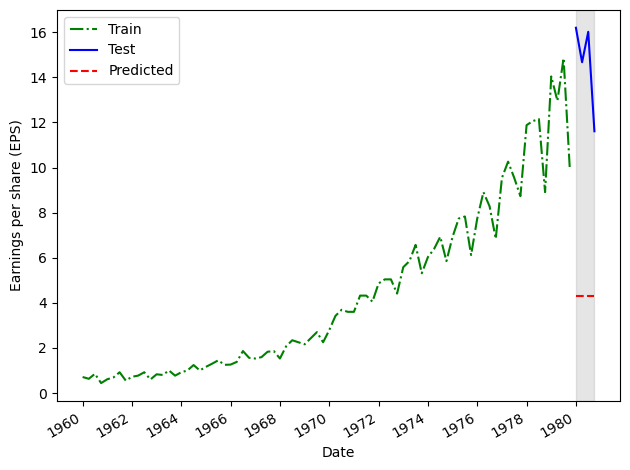

In [14]:
plot_data_with_prediction(test=test_data, train=train_data, pred_string_name="pred_mean")

## Forecast by last year's mean

In [12]:
last_year_mean = np.mean(train_data.data[-4:])
last_year_mean

12.96

In [16]:
test_data.loc[:, "pred_last_y_mean"] = last_year_mean

/tmp/ipykernel_5313/1904612893.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.loc[:, "pred_last_y_mean"] = last_year_mean


In [17]:
mape_last_year_mean = calculate_mape(test_data["data"], test_data["pred_last_y_mean"])
mape_last_year_mean

15.5963680725103

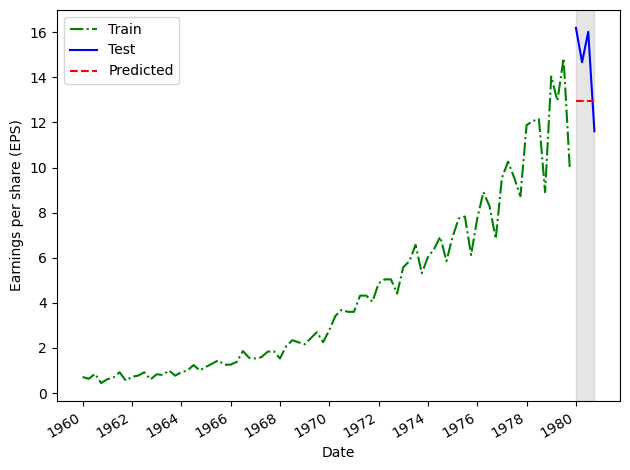

In [18]:
plot_data_with_prediction(test=test_data, train=train_data, pred_string_name="pred_last_y_mean")

## Forecasting by last known value

In [29]:
last_val = train_data.data.iloc[-1]
last_val

9.99

In [31]:
test_data.loc[:, "pred_last"] = last_val

In [32]:
mape_last = calculate_mape(test_data["data"], test_data["pred_last"])
mape_last

30.457277908606535

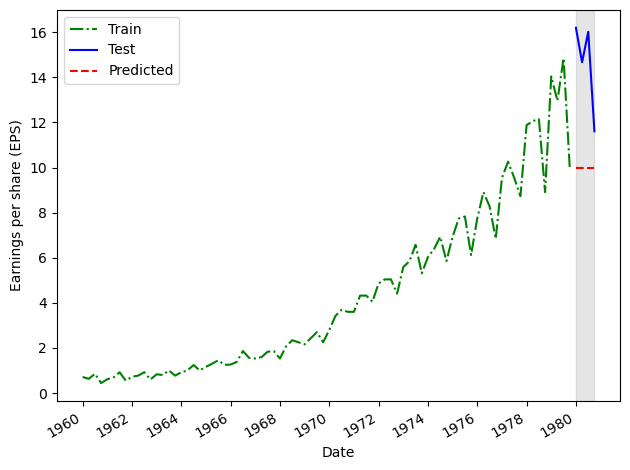

In [33]:
plot_data_with_prediction(test=test_data, train=train_data, pred_string_name="pred_last")

## Naive seasonal forecast

In [35]:
test_data.loc[:, "pred_last_season"] = train_data["data"][-4:].values

/tmp/ipykernel_5313/3072741837.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.loc[:, "pred_last_season"] = train_data["data"][-4:].values


In [36]:
mape_naive_seasonal = calculate_mape(test_data["data"], test_data["pred_last_season"])
mape_naive_seasonal

11.561658552433654

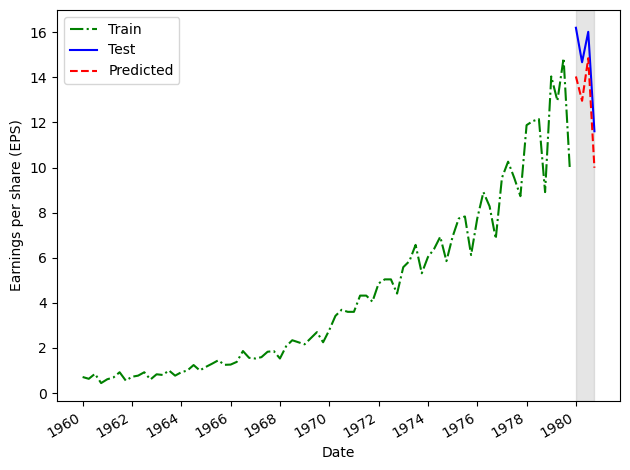

In [37]:
plot_data_with_prediction(test=test_data, train=train_data, pred_string_name="pred_last_season")